https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

plt.rc("font", size=14)

In [3]:
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [4]:
import warnings
warnings.simplefilter(action='ignore')

In [5]:
input_train_path = './train.csv'
input_test_path = './test.csv'

In [6]:
train_df = pd.read_csv(input_train_path)
test_df = pd.read_csv(input_test_path)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


In [9]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 418.


## data quality and missing data assessment

In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
related_features_df = train_df[['Pclass', 'Age', 'SibSp', 'Parch']].copy()
related_features_df

,Pclass,Age,SibSp,Parch
0,3,22.0,1,0
1,1,38.0,1,0
2,3,26.0,0,0
3,1,35.0,1,0
4,3,35.0,0,0
...,...,...,...,...
886,2,27.0,0,0
887,1,19.0,0,0
888,3,NaN,1,2
889,1,26.0,0,0


In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# data correlative
related_features_df.corr()

,Pclass,Age,SibSp,Parch
Pclass,1.000000,-0.369226,0.083081,0.018443
Age,-0.369226,1.000000,-0.308247,-0.189119
SibSp,0.083081,-0.308247,1.000000,0.414838
Parch,0.018443,-0.189119,0.414838,1.000000


### age data missing

In [15]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


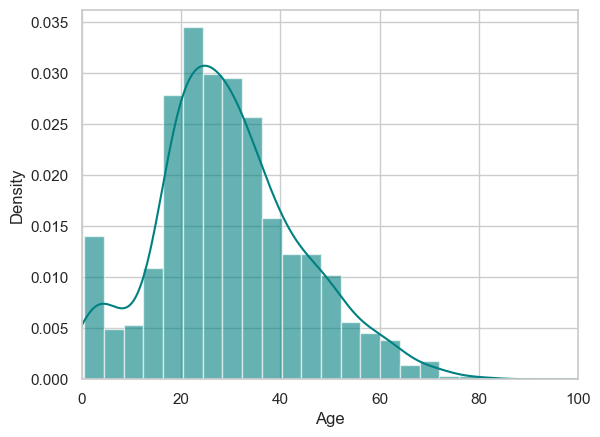

In [16]:
ax = train_df["Age"].hist(bins=20, density=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(0, 100)
plt.show()

In [17]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [18]:
train_df[train_df['Age'].notna()].sample()['Age']

663    36.0
Name: Age, dtype: float64

### cabin data missing

In [19]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


### embarked missing value

In [20]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


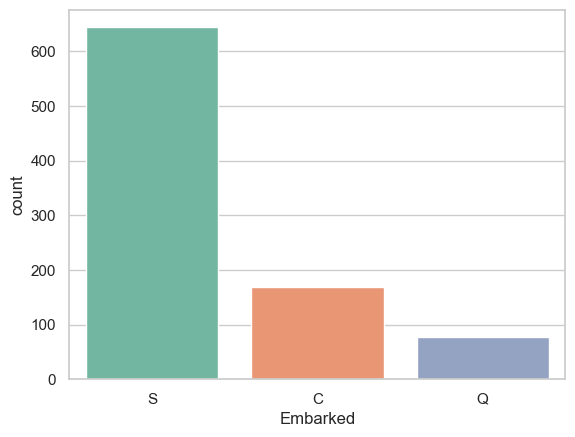

In [21]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

In [22]:
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


## adjustment of data

In [23]:
train_data = train_df.copy()
# train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
# TODO 可以尝试使用cell[18]的随机生成的方法填补空缺值
train_data['Age'].fillna(method='pad', axis=0, inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


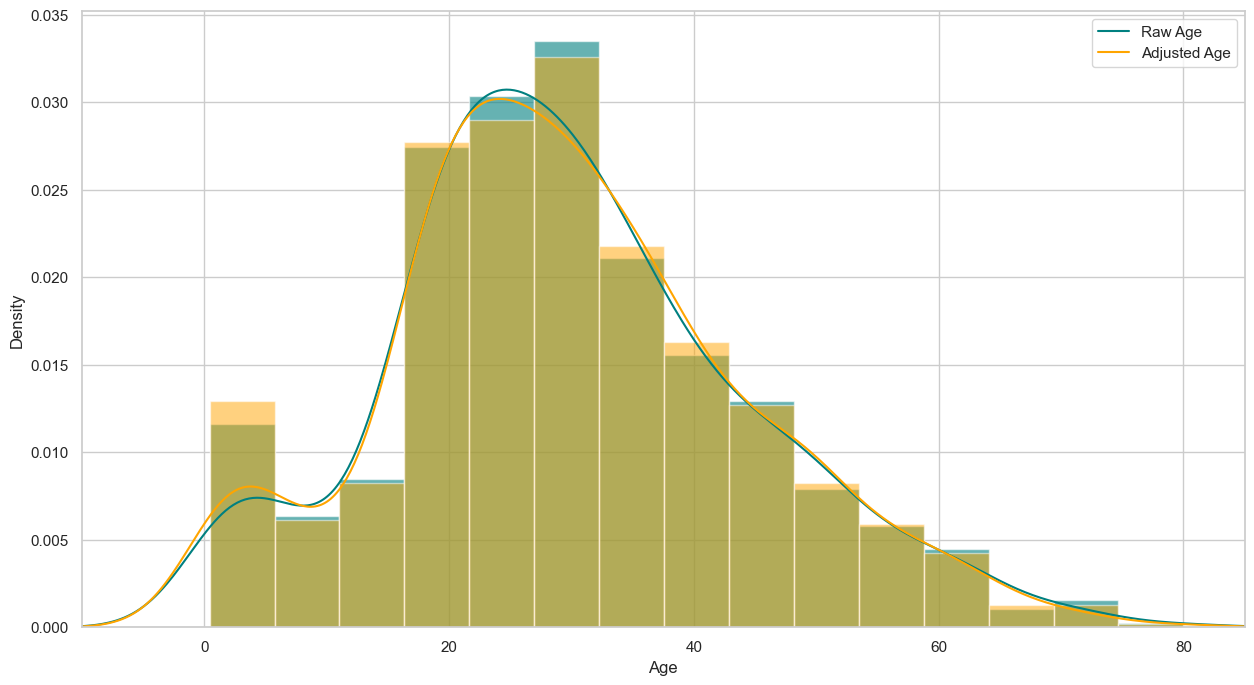

In [24]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [25]:
# create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
# train_data.drop('SibSp', axis=1, inplace=True)
# train_data.drop('Parch', axis=1, inplace=True)

In [26]:
# create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,SibSp,Parch,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,1,0,7.2500,0,False,False,True,False,False,True,True
1,1,38.0,1,0,71.2833,0,True,False,False,True,False,False,False
2,1,26.0,0,0,7.9250,1,False,False,True,False,False,True,False
3,1,35.0,1,0,53.1000,0,True,False,False,False,False,True,False
4,0,35.0,0,0,8.0500,1,False,False,True,False,False,True,True


## test data process

In [27]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [28]:
test_data = test_df.copy()
test_data["Age"].fillna(method='pad', axis=0, inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,False,False,True,False,True,False,True
1,47.0,7.0000,0,False,False,True,False,False,True,False
2,62.0,9.6875,1,False,True,False,False,True,False,True
3,27.0,8.6625,1,False,False,True,False,False,True,True
4,22.0,12.2875,0,False,False,True,False,False,True,False


In [29]:
final_test.isnull().sum()

Age            0
Fare           0
TravelAlone    0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_male       0
dtype: int64

## Exploratory Data Analysis

### Exploratory of Age

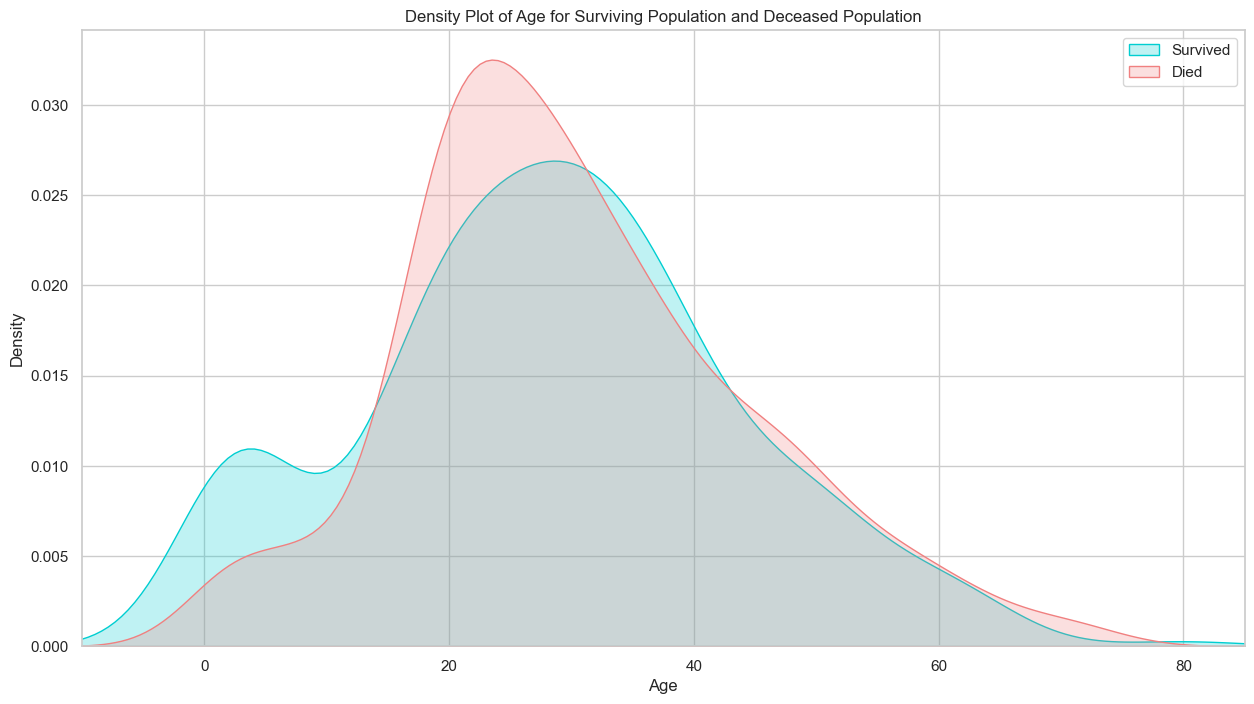

In [37]:
plt.figure(figsize=(15, 8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel = 'Age')
plt.xlim(-10,85)
plt.show()

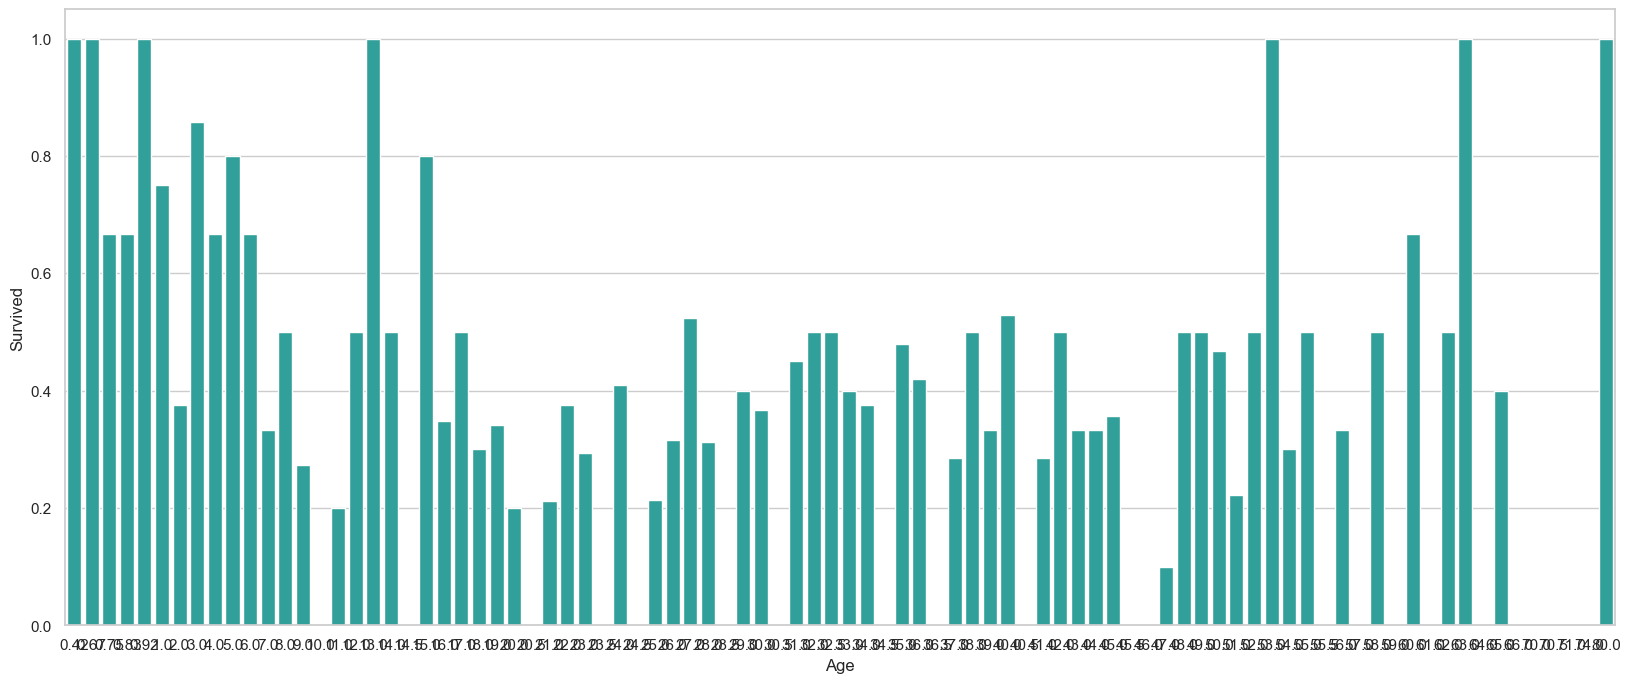

In [38]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [39]:
final_train['IsChildren']=np.where(final_train['Age']<=16, 1, 0)
final_test['IsChildren']=np.where(final_test['Age']<=16, 1, 0)

## Logistic Regression

### feature selection

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [59]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2", "Pclass_3","Embarked_C","Embarked_Q", "Embarked_S","Sex_male","IsChildren"]
train_x = final_train[cols]
train_y = final_train['Survived']

In [60]:
LR = LogisticRegression()
LR.fit(train_x, train_y)

LogisticRegression()

In [61]:
final_test

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsChildren
0,34.5,7.8292,1,False,False,True,False,True,False,True,0
1,47.0,7.0000,0,False,False,True,False,False,True,False,0
2,62.0,9.6875,1,False,True,False,False,True,False,True,0
3,27.0,8.6625,1,False,False,True,False,False,True,True,0
4,22.0,12.2875,0,False,False,True,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,8.0500,1,False,False,True,False,False,True,True,0
414,39.0,108.9000,1,True,False,False,True,False,False,False,0
415,38.5,7.2500,1,False,False,True,False,False,True,True,0
416,38.5,8.0500,1,False,False,True,False,False,True,True,0


In [62]:
train_x

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsChildren
0,22.0,7.2500,0,False,False,True,False,False,True,True,0
1,38.0,71.2833,0,True,False,False,True,False,False,False,0
2,26.0,7.9250,1,False,False,True,False,False,True,False,0
3,35.0,53.1000,0,True,False,False,False,False,True,False,0
4,35.0,8.0500,1,False,False,True,False,False,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,1,False,True,False,False,False,True,True,0
887,19.0,30.0000,1,True,False,False,False,False,True,False,0
888,19.0,23.4500,0,False,False,True,False,False,True,False,0
889,26.0,30.0000,1,True,False,False,True,False,False,True,0


In [64]:
final_test['Survived'] = LR.predict(final_test)

In [65]:
final_test['PassengerId'] = test_df['PassengerId']

In [66]:
submission = final_test[['PassengerId','Survived']]
submission.to_csv("submission.csv", index=False)
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
